In [47]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
import statsmodels.api as sm
import pandas as pd
from matplotlib.pyplot import subplots

In [44]:
Auto = load_data('Auto')
Auto.columns
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [45]:
X = MS(['horsepower']).fit_transform(Auto)
y = Auto['mpg']
model = sm.OLS(y,X)
results = model.fit()
summarize(results)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           7.03e-81
Time:                        09:45:43   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Use the sm.OLS() function to perform a simple linear regression
with mpg as the response and horsepower as the predictor. Use
the summarize() function to print the results. Comment on the
output. For example:
i. Is there a relationship between the predictor and the response?
ii. How strong is the relationship between the predictor and
the response?
iii. Is the relationship between the predictor and the response
positive or negative?
iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confdence and prediction
intervals?


Answers:
i)Yes
ii)The R^2 statistic is 0.606 which tells us that the roughly 2/3's of the variablitity in the mpg is explained by our linear regression using horsepower. So the relationship is fairly strong.
iii)Negative

In [38]:
test_vals = pd.DataFrame({'horsepower':[98]})
testX = MS(['horsepower']).fit_transform(test_vals)
new_prediction = results.get_prediction(testX)
print(new_prediction.predicted)
print(new_prediction.conf_int(alpha=0.05))
print(new_prediction.conf_int(obs=True,alpha=0.05))

[24.46707715]
[[23.97307896 24.96107534]]
[[14.80939607 34.12475823]]


iv) The predicted mpg for a horsepower of 98 is 24.46707715, the 95% confidence interval is [23.97307896 24.96107534] and the 95% prediction interval is [14.80939607 34.12475823]

b) Plot the response and the predictor in a new set of axes ax. Use
the ax.axline() method or the abline() function defned in the
lab to display the least squares regression line.

C:\Users\William\AppData\Local\Temp\ipykernel_39580\1749841860.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)


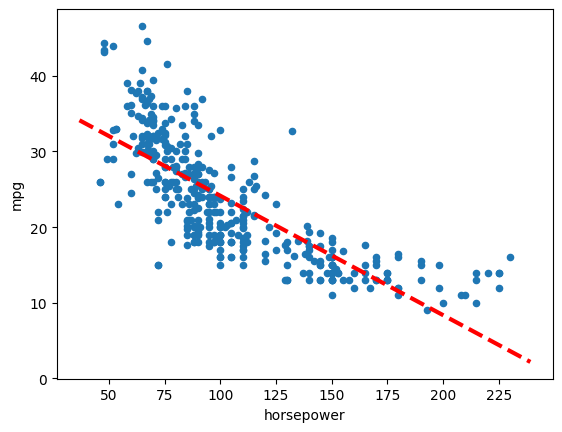

In [57]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)

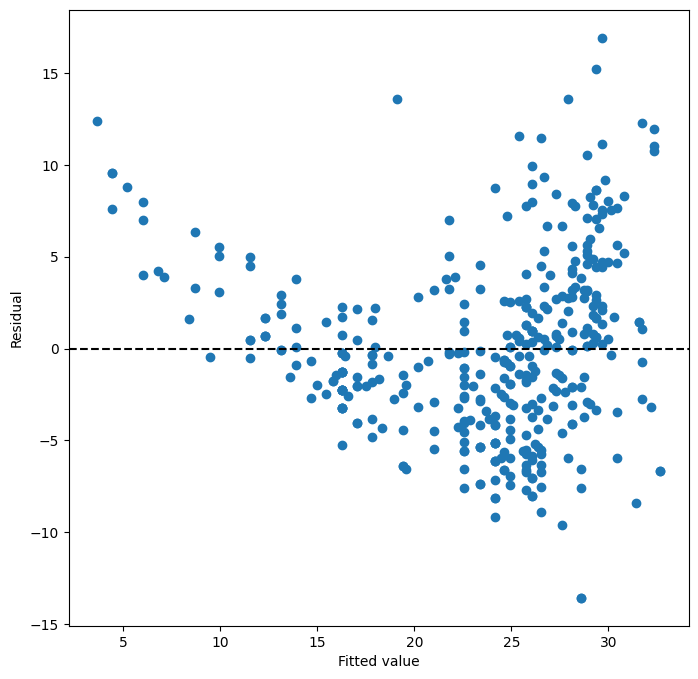

In [61]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')


(c) Produce some of diagnostic plots of the least squares regression
ft as described in the lab. Comment on any problems you see
with the ft.

Answer:
From the plot of the fitted value versus the residual that is shown above we can see that the scatter doesn't seem to be completely random, implying that there is some non-linearity that our linear model doesn't account at the tails of the line where the residuals are higher.